In [2]:
print hit4hmm2hsp.objects.count()
# s35s = classification.objects.all()
# s35 = s35s[12]

5233028


In [3]:

import matplotlib
matplotlib.use("Agg")
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.environ["SEQlib"] = '/data/sequence-data'
os.environ["SEQlib"] = '$repos/cathdb'
import re
p_hmmlen = re.compile('LENG  (\d+)\n')

import numpy as np
from tst.domutil.util import *
from time import time



hmms = HMMprofile.objects.all()[:200]

/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


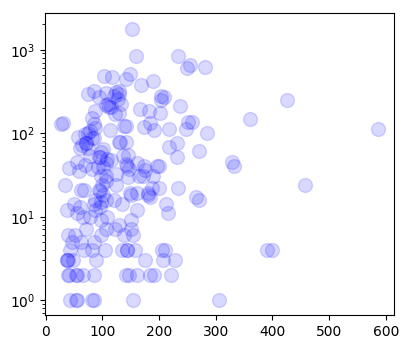

In [4]:
xs = []
ys = []
for hmm in hmms:
    hmm_text = hmm.text
    y = hmm.hits.count()
    if y:
        xs += [int(p_hmmlen.findall(hmm_text)[0])]
        ys += [ y ]
    
kwargs = {}
    
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1.set_yscale('log')
points = ax1.scatter(xs,ys, 
    # colors,
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
    marker ='o',
    # c = colors,
     s =100,
     alpha = 0.15,
     # **kwargs
     )


In [5]:
from scipy.spatial.distance import *
# from sklearn.metrics.pairwise import pairwise_distances as pdist
# def ISS(us,vs):
# #     u.hits
#     D = []
#     for ui,u in enumerate(us):
#         for v in vs[ui:]:
#             D.append(0)
# #             D.append(u.)
# #             D.append(0)
#     D = squareform(D)
# #     print D.dims
#     return D


def ISS(u,v):
    u = u[0]; v = v[0]
#     print u[0]
#     u_hitids = u.hits.values_list("id",flat = True)
#     v_hitids = v.hits.values_list("id",flat = True)
    d = float((u.hits.all() & v.hits.all() ).count())/ (u.hits.count() * v.hits.count() + 1)
#     d = u.hits.count()
    return d
def ISS(u,v):
#     c.count()
    u = u[0]; v = v[0]
    ulen = len(u)
    vlen = len(v)
#     if ulen <= vlen:
#         inter_count = sum(u_curr in v for u_curr in u )
#     else:
#         inter_count = sum(u_curr in u for u_curr in v )
    inter_count = len(set(u) & set(v))
    d = 1 - float(2*inter_count)/(ulen+vlen+1)

    return d

In [7]:
X = np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)

t0 = time()
c = counter(range(X.size**2/2))

dm = pdist( X = X,metric =  ISS)
# D = squareform(dm)
print time()-t0
# X[0]

0.331820964813


In [5]:
hmms = HMMprofile.objects.all()[:200]
X = np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)



In [8]:
t0 = time()
c = counter(range(X.size**2/2))

dm = pdist( X = X,metric =  ISS)
# D = squareform(dm)
print time()-t0

0.344930887222


In [16]:
t0 = time()
c = counter(range(len(X)**2/2),per = 1E3)
from multiprocessing import *


def batch(X,batch_size = 5 ):
    lst = []
    i = 0
    for x in X:
        i += 1
        lst += [x]
        if not i % batch_size:
            yield lst
            lst = []
# print next(g)

def queue_gen(X):
    i = 0
    for ui,u in enumerate(X):
        for v in X[ui+1:]:
            i += 1
            yield [u,v]

g  = batch(queue_gen(X),5)

    
def ISS0(x):
#     c.count()
    return(ISS(*x))
def ISS1(xs):
#     c.count()
    return([ISS(*x) for x in xs] )

# if 1:
N = 10
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        p = Pool(5)
        dm = (p.map_async(ISS0, (queue_gen(X))))
        dm = dm.get()
    #     sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
        p.close()
print time()-t0 
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        p = Pool(5)
#         dm1 = (p.map(ISS0, (queue_gen(X)), chunksize = 5))
        dm1 = (p.map(ISS0, (queue_gen(X)), ))
    #     sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
        p.close()
print time()-t0 
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        dm2 = pdist(X,ISS)
print time()-t0 

3.99566602707
4.33712887764
3.12536811829


In [18]:
for i in range(10):
    if __name__ == '__main__':
        p = Pool(7)
#         r = (p.map(ISS0, (queue_gen(X))))
        sum(p.map(ISS1, batch(queue_gen(X)), 100),[] )
        p.close()
print time()-t0 

52.2096440792


In [19]:
all_hmms = HMMprofile.objects.annotate(hcount = Count("hits"))

In [37]:
# hmms = all_hmms.exclude(hcount__lte=0)
print hmms.count()

21074


In [21]:
sDB = seqDB.objects.get(name = 'CATH')
sDB.sequence_set.count()
seq = sDB.sequence_set.first()
# seq.HMMprofile
# seq.hmmprofile
# dir(seq)
seq.hmmprofile_set.count()

36

In [23]:
ids = HMMprofile.objects.values_list('id',flat = True)
print max(ids)- min(ids)
print min(ids)
print len(ids)


21085
1
21086


In [28]:
c = counter(range(sDB.sequence_set.count()))
seqset_all = sDB.sequence_set.all()

import itertools as it
def pair_gen(seqset_all):
    c = counter(range(seqset_all.count()))
    batches = batch_qs( seqset_all, 500)
    for seqset in batches:
        
#             hmmids = seq.values_list("hmmprofile",flat =True)
        for seq in seqset:
            c.count()
            hmmids = seq.hmmprofile_set.values_list("id",flat = True)
            pairs = it.combinations(sorted(hmmids),2)
            for p in pairs:
                yield p
# for seq in sDB.sequence_set:
#     hmms = seq.hmmprofile_set.all()
#     c.count()
    #     print i

In [26]:
a = np.ndarray(shape = [21086,21086],dtype = 'int')
# np.ndarray?
# a[0]

In [30]:
seqset_all.count()

80422

In [40]:
from collections import Counter
import multiprocessing as mp
# class Counter(object):
#     def __init__(self):
#         self.val = mp.Value('i', 0)

#     def increment(self, n=1):
#         with self.val.get_lock():
#             self.val.value += n

#     @property
#     def value(self):
#         return self.val.value
t0 = time()    
g = pair_gen(seqset_all.all())
counts = Counter(g)
print time()-t0
# set(g)

0 of -1
100 of -1
200 of -1
300 of -1
400 of -1
500 of -1
600 of -1
700 of -1
800 of -1
900 of -1
1000 of -1
1100 of -1
1200 of -1
1300 of -1
1400 of -1
1500 of -1
1600 of -1
1700 of -1
1800 of -1
1900 of -1
2000 of -1
2100 of -1
2200 of -1
2300 of -1
2400 of -1
2500 of -1
2600 of -1
2700 of -1
2800 of -1
2900 of -1
3000 of -1
3100 of -1
3200 of -1
3300 of -1
3400 of -1
3500 of -1
3600 of -1
3700 of -1
3800 of -1
3900 of -1
4000 of -1
4100 of -1
4200 of -1
4300 of -1
4400 of -1
4500 of -1
4600 of -1
4700 of -1
4800 of -1
4900 of -1
5000 of -1
5100 of -1
5200 of -1
5300 of -1
5400 of -1
5500 of -1
5600 of -1
5700 of -1
5800 of -1
5900 of -1
6000 of -1
6100 of -1
6200 of -1
6300 of -1
6400 of -1
6500 of -1
6600 of -1
6700 of -1
6800 of -1
6900 of -1
7000 of -1
7100 of -1
7200 of -1
7300 of -1
7400 of -1
7500 of -1
7600 of -1
7700 of -1
7800 of -1
7900 of -1
8000 of -1
8100 of -1
8200 of -1
8300 of -1
8400 of -1
8500 of -1
8600 of -1
8700 of -1
8800 of -1
8900 of -1
9000 of -1
9100 of -1


69300 of -1
69400 of -1
69500 of -1
69600 of -1
69700 of -1
69800 of -1
69900 of -1
70000 of -1
70100 of -1
70200 of -1
70300 of -1
70400 of -1
70500 of -1
70600 of -1
70700 of -1
70800 of -1
70900 of -1
71000 of -1
71100 of -1
71200 of -1
71300 of -1
71400 of -1
71500 of -1
71600 of -1
71700 of -1
71800 of -1
71900 of -1
72000 of -1
72100 of -1
72200 of -1
72300 of -1
72400 of -1
72500 of -1
72600 of -1
72700 of -1
72800 of -1
72900 of -1
73000 of -1
73100 of -1
73200 of -1
73300 of -1
73400 of -1
73500 of -1
73600 of -1
73700 of -1
73800 of -1
73900 of -1
74000 of -1
74100 of -1
74200 of -1
74300 of -1
74400 of -1
74500 of -1
74600 of -1
74700 of -1
74800 of -1
74900 of -1
75000 of -1
75100 of -1
75200 of -1
75300 of -1
75400 of -1
75500 of -1
75600 of -1
75700 of -1
75800 of -1
75900 of -1
76000 of -1
76100 of -1
76200 of -1
76300 of -1
76400 of -1
76500 of -1
76600 of -1
76700 of -1
76800 of -1
76900 of -1
77000 of -1
77100 of -1
77200 of -1
77300 of -1
77400 of -1
77500 of -1
7760

In [55]:
from scipy.sparse import *
# D = csr_matrix(zip(*counts.keys()),counts.values())
# D = dok_matrix((21086,21086),dtype = np.int)

t0 = time()    
c=counter(counts,per=10000)
for (x,y),v in counts.iteritems():
    c.count()
    D[x-1,y-1] = v
print time()-t0

0 of 6563388
10000 of 6563388
20000 of 6563388
30000 of 6563388
40000 of 6563388
50000 of 6563388
60000 of 6563388
70000 of 6563388
80000 of 6563388
90000 of 6563388
100000 of 6563388
110000 of 6563388
120000 of 6563388
130000 of 6563388
140000 of 6563388
150000 of 6563388
160000 of 6563388
170000 of 6563388
180000 of 6563388
190000 of 6563388
200000 of 6563388
210000 of 6563388
220000 of 6563388
230000 of 6563388
240000 of 6563388
250000 of 6563388
260000 of 6563388
270000 of 6563388
280000 of 6563388
290000 of 6563388
300000 of 6563388
310000 of 6563388
320000 of 6563388
330000 of 6563388
340000 of 6563388
350000 of 6563388
360000 of 6563388
370000 of 6563388
380000 of 6563388
390000 of 6563388
400000 of 6563388
410000 of 6563388
420000 of 6563388
430000 of 6563388
440000 of 6563388
450000 of 6563388
460000 of 6563388
470000 of 6563388
480000 of 6563388
490000 of 6563388
500000 of 6563388
510000 of 6563388
520000 of 6563388
530000 of 6563388
540000 of 6563388
550000 of 6563388
560000

4380000 of 6563388
4390000 of 6563388
4400000 of 6563388
4410000 of 6563388
4420000 of 6563388
4430000 of 6563388
4440000 of 6563388
4450000 of 6563388
4460000 of 6563388
4470000 of 6563388
4480000 of 6563388
4490000 of 6563388
4500000 of 6563388
4510000 of 6563388
4520000 of 6563388
4530000 of 6563388
4540000 of 6563388
4550000 of 6563388
4560000 of 6563388
4570000 of 6563388
4580000 of 6563388
4590000 of 6563388
4600000 of 6563388
4610000 of 6563388
4620000 of 6563388
4630000 of 6563388
4640000 of 6563388
4650000 of 6563388
4660000 of 6563388
4670000 of 6563388
4680000 of 6563388
4690000 of 6563388
4700000 of 6563388
4710000 of 6563388
4720000 of 6563388
4730000 of 6563388
4740000 of 6563388
4750000 of 6563388
4760000 of 6563388
4770000 of 6563388
4780000 of 6563388
4790000 of 6563388
4800000 of 6563388
4810000 of 6563388
4820000 of 6563388
4830000 of 6563388
4840000 of 6563388
4850000 of 6563388
4860000 of 6563388
4870000 of 6563388
4880000 of 6563388
4890000 of 6563388
4900000 of 6

In [ ]:
cD = D.to_cs

In [72]:
import cPickle as pk
pk.dump(D,open('CATHS100.pk','wb'))
# np.ndarray?

# counts[(1,100)]
# dx = 


In [29]:
g = pair_gen(seqset_all.all()[:2000])

for i in range(10):
    if __name__ == '__main__':
        p = Pool(7)
#         r = (p.map(ISS0, (queue_gen(X))))
        sum(p.map(ISS1, batch(queue_gen(X)), 100),[] )
        p.close()

for x,y in g:
#     print x,y
    a[x-1,y-1] += 1
    

0 of -1
100 of -1
200 of -1
300 of -1
400 of -1
500 of -1
600 of -1
700 of -1
800 of -1
900 of -1
1000 of -1
1100 of -1
1200 of -1
1300 of -1
1400 of -1
1500 of -1
1600 of -1
1700 of -1
1800 of -1
1900 of -1


In [62]:
# from itertools
import itertools as it
print hmmids.count()

pairs = it.combinations(sorted(hmmids[:20]),2)
for p in pairs:
    yield p

422
(13470L, 13571L)
(13470L, 13587L)
(13470L, 13708L)
(13470L, 13779L)
(13470L, 13853L)
(13470L, 13875L)
(13470L, 14053L)
(13470L, 14318L)
(13470L, 14737L)
(13470L, 14951L)
(13470L, 14986L)
(13470L, 15015L)
(13470L, 15016L)
(13470L, 15252L)
(13470L, 15309L)
(13470L, 15556L)
(13470L, 15574L)
(13470L, 15653L)
(13470L, 16153L)
(13571L, 13587L)
(13571L, 13708L)
(13571L, 13779L)
(13571L, 13853L)
(13571L, 13875L)
(13571L, 14053L)
(13571L, 14318L)
(13571L, 14737L)
(13571L, 14951L)
(13571L, 14986L)
(13571L, 15015L)
(13571L, 15016L)
(13571L, 15252L)
(13571L, 15309L)
(13571L, 15556L)
(13571L, 15574L)
(13571L, 15653L)
(13571L, 16153L)
(13587L, 13708L)
(13587L, 13779L)
(13587L, 13853L)
(13587L, 13875L)
(13587L, 14053L)
(13587L, 14318L)
(13587L, 14737L)
(13587L, 14951L)
(13587L, 14986L)
(13587L, 15015L)
(13587L, 15016L)
(13587L, 15252L)
(13587L, 15309L)
(13587L, 15556L)
(13587L, 15574L)
(13587L, 15653L)
(13587L, 16153L)
(13708L, 13779L)
(13708L, 13853L)
(13708L, 13875L)
(13708L, 14053L)
(13708L, 1

In [9]:
X = np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)

In [148]:
us = X
vs = X
dm = []

for ui,u in enumerate(us):
    for v in vs[ui:]:
        dm.append( ISS(u,v) )
D = squareform(dm)

0 of 180000
100 of 180000
200 of 180000
300 of 180000
400 of 180000
500 of 180000
600 of 180000
700 of 180000
800 of 180000
900 of 180000
1000 of 180000
1100 of 180000
1200 of 180000
1300 of 180000
1400 of 180000
1500 of 180000
1600 of 180000
1700 of 180000
1800 of 180000
1900 of 180000
2000 of 180000
2100 of 180000
2200 of 180000
2300 of 180000
2400 of 180000
2500 of 180000
2600 of 180000
2700 of 180000
2800 of 180000
2900 of 180000
3000 of 180000
3100 of 180000
3200 of 180000
3300 of 180000
3400 of 180000
3500 of 180000
3600 of 180000
3700 of 180000
3800 of 180000
3900 of 180000
4000 of 180000
4100 of 180000
4200 of 180000
4300 of 180000
4400 of 180000
4500 of 180000
4600 of 180000
4700 of 180000
4800 of 180000
4900 of 180000
5000 of 180000
5100 of 180000
5200 of 180000
5300 of 180000
5400 of 180000
5500 of 180000
5600 of 180000
5700 of 180000
5800 of 180000
5900 of 180000
6000 of 180000
6100 of 180000
6200 of 180000
6300 of 180000
6400 of 180000
6500 of 180000
6600 of 180000
6700 of

53300 of 180000
53400 of 180000
53500 of 180000
53600 of 180000
53700 of 180000
53800 of 180000
53900 of 180000
54000 of 180000
54100 of 180000
54200 of 180000
54300 of 180000
54400 of 180000
54500 of 180000
54600 of 180000
54700 of 180000
54800 of 180000
54900 of 180000
55000 of 180000
55100 of 180000
55200 of 180000
55300 of 180000
55400 of 180000
55500 of 180000
55600 of 180000
55700 of 180000
55800 of 180000
55900 of 180000
56000 of 180000
56100 of 180000
56200 of 180000
56300 of 180000
56400 of 180000
56500 of 180000
56600 of 180000
56700 of 180000
56800 of 180000
56900 of 180000
57000 of 180000
57100 of 180000
57200 of 180000
57300 of 180000
57400 of 180000
57500 of 180000
57600 of 180000
57700 of 180000
57800 of 180000
57900 of 180000
58000 of 180000
58100 of 180000
58200 of 180000
58300 of 180000
58400 of 180000
58500 of 180000
58600 of 180000
58700 of 180000
58800 of 180000
58900 of 180000
59000 of 180000
59100 of 180000
59200 of 180000
59300 of 180000
59400 of 180000
59500 of

104900 of 180000
105000 of 180000
105100 of 180000
105200 of 180000
105300 of 180000
105400 of 180000
105500 of 180000
105600 of 180000
105700 of 180000
105800 of 180000
105900 of 180000
106000 of 180000
106100 of 180000
106200 of 180000
106300 of 180000
106400 of 180000
106500 of 180000
106600 of 180000
106700 of 180000
106800 of 180000
106900 of 180000
107000 of 180000
107100 of 180000
107200 of 180000
107300 of 180000
107400 of 180000
107500 of 180000
107600 of 180000
107700 of 180000
107800 of 180000
107900 of 180000
108000 of 180000
108100 of 180000
108200 of 180000
108300 of 180000
108400 of 180000
108500 of 180000
108600 of 180000
108700 of 180000
108800 of 180000
108900 of 180000
109000 of 180000
109100 of 180000
109200 of 180000
109300 of 180000
109400 of 180000
109500 of 180000
109600 of 180000
109700 of 180000
109800 of 180000
109900 of 180000
110000 of 180000
110100 of 180000
110200 of 180000
110300 of 180000
110400 of 180000
110500 of 180000
110600 of 180000
110700 of 1800

154400 of 180000
154500 of 180000
154600 of 180000
154700 of 180000
154800 of 180000
154900 of 180000
155000 of 180000
155100 of 180000
155200 of 180000
155300 of 180000
155400 of 180000
155500 of 180000
155600 of 180000
155700 of 180000
155800 of 180000
155900 of 180000
156000 of 180000
156100 of 180000
156200 of 180000
156300 of 180000
156400 of 180000
156500 of 180000
156600 of 180000
156700 of 180000
156800 of 180000
156900 of 180000
157000 of 180000
157100 of 180000
157200 of 180000
157300 of 180000
157400 of 180000
157500 of 180000
157600 of 180000
157700 of 180000
157800 of 180000
157900 of 180000
158000 of 180000
158100 of 180000
158200 of 180000
158300 of 180000
158400 of 180000
158500 of 180000
158600 of 180000
158700 of 180000
158800 of 180000
158900 of 180000
159000 of 180000
159100 of 180000
159200 of 180000
159300 of 180000
159400 of 180000
159500 of 180000
159600 of 180000
159700 of 180000
159800 of 180000
159900 of 180000
160000 of 180000
160100 of 180000
160200 of 1800

In [143]:
# dm.size

# None in []

179700

In [ ]:
D.shape

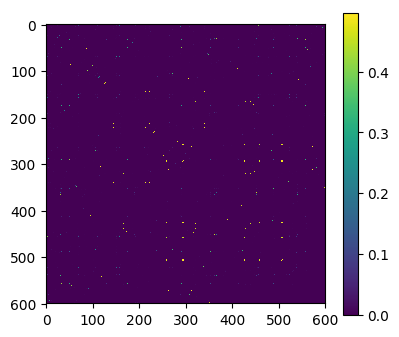

In [116]:
us = X
vs = X
# x =
# D = []
# for ui,u in enumerate(us):
#     for v in vs[ui:]:
#         D.append(0)
# D = squareform(D)
# # print D.dims

# dm = pdist( X, ISS)
# D = squareform(dm)
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
imDmat = ax1.imshow(D)
plt.colorbar(imDmat)
# X.shape
# dm = cdist( X.T,X.T, ISS)
# np.array(list(hmms))

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


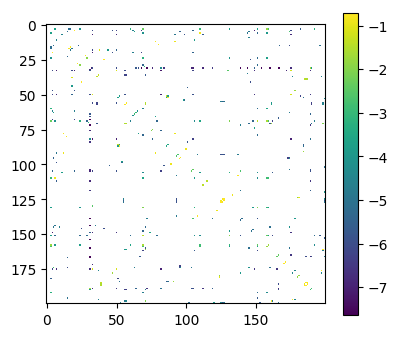

In [68]:
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
imdata = np.log(D)
imDmat = ax1.imshow(imdata)
plt.colorbar(imDmat)

In [138]:
hmm1.hit4hmm2hsp_set

In [152]:
# hmm1.hits.count()
# hmm2.hits.count()

4

In [167]:
hmm1.hits.all().count()

310

In [179]:
# os.path.isfile(full("$PDBlib/1a41A01"))


False

In [68]:
inter_hitseq = hmm1.hits.all() & hmm2.hits.all()
hits1 = hmm1.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
hits2 = hmm2.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
fmt = "%s,\t domain:%s\t length:%s,\t hitnum:%d"
print "intersection count is",inter_hitseq.count()
print  fmt %(hmm1,hmm1.cath_node.domain, p_hmmlen.findall(hmm1.text)[0], hmm1.hits.count() )
print fmt % (hmm2,hmm2.cath_node.domain, p_hmmlen.findall(hmm2.text)[0], hmm2.hits.count() )
for i,j in zip(hits1,hits2):
    try:
        node =  domain.objects.get(domain_id = i.target.acc).classification
    except:
        node = ''
    print i.target.acc,i.bitscore,
    print j.target.acc,j.bitscore
#     print node
    print i.start,j.start
    print i.end,j.end

intersection count is 0
HMM for 3.40.50.2300.90.0 ,	 domain:1dbwB00	 length:126,	 hitnum:339
HMM for 2.60.40.1180.39.0 ,	 domain:1g5aA04	 length:80,	 hitnum:48


In [78]:
hmm1.cath_node.parent

<classification: 2.60.120.20.0>

In [66]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)
# D[largest_indices(D,10)]
D = squareform(dm)
tD = np.triu(D[-2000:,-2000:])

lst = zip(*largest_indices(tD,20000))
len(D)

2001

In [48]:
# hmms.count()
D[-1,-2]

0.00014007564084606017

In [67]:
c = counter(lst,per = 1)
i = 0
for idxx,idxy in lst:
#     print
    hmm1 = hmms[idxx]
    hmm2 = hmms[idxy]
#     if hmm1.cath_node.parent == hmm2.cath_node.parent:
    cnode1 = hmm1.cath_node
    cnode2 = hmm2.cath_node
    if cnode1.Class == cnode2.Class:
        continue
    c.count()   
    
    if c.i >= 2:
        i+=1
        print hmm1
        print hmm2
        print D[idxx,idxy]
        print hmm1.hits.count() + hmm2.hits.count()
        print "http://xhits.cathdb.info/crosshits.php?sf2=%s&sf1=%s&db_source=Crosshits_v4_1_0"%(cnode1.superfamily(),cnode2.superfamily())
        if i == 2:
            break

0 of 20000
1 of 20000
HMM for 3.40.50.2300.90.0 
HMM for 2.40.490.10.4.0 
1.0
344
http://xhits.cathdb.info/crosshits.php?sf2=3.40.50.2300&sf1=2.40.490.10&db_source=Crosshits_v4_1_0
2 of 20000
HMM for 3.40.50.2300.90.0 
HMM for 2.60.40.1180.39.0 
1.0
387
http://xhits.cathdb.info/crosshits.php?sf2=3.40.50.2300&sf1=2.60.40.1180&db_source=Crosshits_v4_1_0


In [89]:
for hmm in [hmm1,hmm2]:
    print hmm.cath_node.domain
    print '\n'.join(hmm.text.splitlines()[:10])
    print 
# print '\n'.join(hmm2.text.splitlines()[:10])

1a62A01
HMMER3/f [3.1b1 | May 2013]
NAME  cath|4_1_0|1a62A01/2-47
LENG  38
ALPH  amino
RF    yes
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Mon Apr 20 18:09:09 2015

1a62A02
HMMER3/f [3.1b1 | May 2013]
NAME  cath|4_1_0|1a62A02/48-117
LENG  66
ALPH  amino
RF    yes
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Mon Apr 20 23:27:47 2015



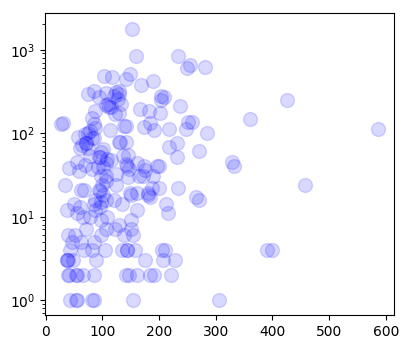

In [85]:
xs = []
ys = []
for hmm in hmms:
    hmm_text = hmm.text
    y = hmm.hits.count()
    if y:
        xs += [int(p_hmmlen.findall(hmm_text)[0])]
        ys += [ y ]
    
kwargs = {}
    
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1.set_yscale('log')
points = ax1.scatter(xs,ys, 
    # colors,
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
    marker ='o',
    # c = colors,
     s =100,
     alpha = 0.15,
     # **kwargs
     )


In [90]:
import subprocess
tmpdir = "/tmp/prc"
prcfmt = "http://update.cathdb.info/api/data/hmm/%s.prc"
dom  = hmm1.cath_node.domain
subprocess.check_call(["wget",prcfmt%dom,"-O","%s/%s.prc"%(tmpdir,dom)])
dom =  hmm2.cath_node.domain
subprocess.check_call(["wget",prcfmt%dom,"-O","%s/%s.prc"%(tmpdir,dom)])

intersection count is 6
HMM for 1.10.720.10.2.0 ,	 domain:1a62A01	 length:38,	 hitnum:12
HMM for 2.40.50.140.57.0 ,	 domain:1a62A02	 length:66,	 hitnum:10
1pvoA01 50.1 -2.8

4 26
42 46
1pv4A01 41.6 111.9
2.40.50.140.126.0
4 48
42 116
1pv4C01 41.6 111.9

4 48
42 116
1pv4D01 41.6 111.9

4 48
42 116
1pv4E01 41.6 111.9

4 48
42 116
1pv4F01 41.6 111.9

4 48
42 116


CalledProcessError: Command '['wget', u'http://update.cathdb.info/api/data/hmm/1a62A01.prc', '-O', u'/tmp/prc/1a62A01.prc']' returned non-zero exit status 1

In [17]:
hmms = HMMprofile.objects.all()[:100]

In [75]:
seqs  = sequence.objects.values_list('acc').annotate(ct= Count('acc'))

In [115]:
seqdup = seqs.filter(ct__gt=1)
seqdup = sequence.objects.filter(acc__in=[x for x,y in seqdup])
# print seqdup.count()

38


In [117]:
seqdup.delete()
# print seqdup.filter(hmmprofile__isnull=True).count()
# ss = sequence.objects.filter(acc=seqdup[0][0])
# ss.filter(hmmprofile__isnull=True).count()
# for s in ss:
#     print s.hmmprofile_set.count()

(38L, {u'tst.HSPfrag': 0L, u'tst.hit4hmm2hsp': 0L, u'tst.sequence': 38L})

In [78]:
# from tst.domutil.util import *
# from tst.utils_db import *

# # hmm = s35.hmmprofile_set.first()
# hmms = HMMprofile.objects.all()
# hmm = hmms[6]
# hmm.cath_node

# # print hmm.text

# seqDB_curr = seqDB.objects.get(name = 'CATH')
# seqDB_file = "$SEQlib/cath-domain-seqs-S100.fa"

# q_hits = hmmsearch(hmm,
# seqDB_curr = seqDB_curr,
# seqDB_file = seqDB_file,
# tmpdir = "/tmp/tmp2"                
# )

# oldhits = hmm.hit4hmm2hsp_set.all()
# for hit in q_hits:
#     hsp = hit[0] ### Assume only one dom per hit
#     jdict = hsp2jdict(hsp, query = hmm )
#     jdict["target_id"] = sequence.objects.get( acc = jdict["target_id"]).id

#     if not oldhits.filter(**jdict).exists():
#         hit_db = hit4hmm2hsp(**jdict)
#         hit_db.save()

# # print hmm

<QuerySet [(u'1vwxA02', 2), (u'1vwxH01', 2), (u'3hf9C00', 2), (u'3hf9E00', 2), (u'3hf9G00', 2), (u'3hf9H00', 2), (u'3hf9J00', 2), (u'3hf9L00', 2), (u'3hf9N00', 2), (u'3hf9P00', 2), (u'3hf9R00', 2), (u'3hf9T00', 2), (u'3hf9V00', 2), (u'3hf9X00', 2), (u'3hf9Z00', 2), (u'3lo3A00', 2), (u'3lo3B00', 2), (u'4il6Z00', 2), (u'4u0gA00', 2)]>

In [172]:
print sequence.objects.count()
%load_ext autoreload
%autoreload 0
%autoreload 1
%autoreload 2
%autoreload 3


import os
os.environ['SEQlib'] = '/media/DATA/Documents/repos/cathdb/'


80407
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
p_cathheader = re.compile('\|([0-9,a-z,A-Z]*)\/')
with open(seqdb_file,'r') as f:
    buf = f.read() 
m  =p_cathheader.findall(buf)
# m  =p_cathheader.search(buf)
# next(m)
# m.groups()[0]
sum(len(x) for x in m)/float(len(m))
# dir(m)
# m.string
# print m.groupdict()
# print len(m)
# print len(set(m))

7.0

In [143]:
m

[]

In [175]:
# seqDB_curr.sequence_set.count()

80422

In [197]:
{1,2,3}

{1, 2, 3}

In [203]:
from tst.utils_db import *
from Bio.SeqIO import FastaIO
debug = 1


behave = "import sequence database"
seqdb_file = full("$SEQlib/cath-domain-seqs-S100.fa")
# seqDB_curr = verify_exist_entry( seqDB, {'name' : 'test_CATH' })
# seqDB_curr = verify_exist_entry( {'name' : 'test_CATH',
#                                  'version': 'test'}, seqDB)
seqDB_curr = seqDB.objects.get(name='CATH')

from time import time
t0 = time()
useFisrt = 1
failcount = 0
lst = {
 '3hf9c00',
 '3hf9e00',
 '3hf9g00',
 '3hf9h00',
 '3hf9j00',
 '3hf9l00',
 '3hf9n00',
 '3hf9p00',
 '3hf9r00',
 '3hf9t00',
 '3hf9x00',
 '3hf9z00',
 '3lo3a00',
 '3lo3b00',
 '4il6z00'}
with open( seqdb_file ) as handle:
    iterator = FastaIO.SimpleFastaParser(handle)
    c = counter(iterator, per=1000)
with open( seqdb_file ) as handle:
    iterator = FastaIO.SimpleFastaParser(handle)

    with transaction.atomic():
        for values in iterator:
            try:
#             if 1:
                header,seq = values
                if c.i == 0:
                    (h_parser, _) = seqheader_guess_parser(header)
                    print "first entry pointing to %s" % seqDB_curr
                    print "h_parser is",h_parser
                    
                jdict = h_parser( header )
                jdict["length"] = len(seq)
                
                if useFisrt:
                    jdict["seqDB"] = seqDB_curr
                else:
                    jdict["seqDB"] = seqDB.objects.get(**jdict["seqDB"])
#                 worker()
#                 if jdict['acc']=='3hf9c00':
                if jdict['acc'] in lst:
                    print "im here"
                    local_worker(jdict)
#             try:
                pass
            except Exception as e:
                if debug: print e,header
                failcount += 1
            c.count()
        
#         print(values)
print "finshed %s from %s" % (behave, seqdb_file)

print '%d instances of %d failed' % (failcount,c.imax)
print('Ended after %.4f sec' % (time()-t0))  # len(lst)d
failrate = failcount/float(c.imax) 
assert failrate < 0.1, 'fail rate is too high: expected < 10%%, actual: %2.2f%%' % (failrate*100)

first entry pointing to CATH_Ver:v4_1_0
h_parser is <function seqheader_parse_cath at 0x7f65d686ded8>
0 of 80422
1000 of 80422
2000 of 80422
3000 of 80422
4000 of 80422
5000 of 80422
6000 of 80422
7000 of 80422
8000 of 80422
9000 of 80422
10000 of 80422
11000 of 80422
12000 of 80422
13000 of 80422
14000 of 80422
15000 of 80422
16000 of 80422
17000 of 80422
18000 of 80422
19000 of 80422
20000 of 80422
21000 of 80422
22000 of 80422
23000 of 80422
24000 of 80422
25000 of 80422
26000 of 80422
27000 of 80422
28000 of 80422
29000 of 80422
30000 of 80422
31000 of 80422
32000 of 80422
33000 of 80422
34000 of 80422
35000 of 80422
36000 of 80422
37000 of 80422
38000 of 80422
39000 of 80422
40000 of 80422
41000 of 80422
42000 of 80422
43000 of 80422
44000 of 80422
45000 of 80422
46000 of 80422
47000 of 80422
48000 of 80422
49000 of 80422
50000 of 80422
51000 of 80422
52000 of 80422
im here
passed
im here
passed
im here
passed
im here
passed
im here
passed
im here
passed
im here
passed
im here
pas

In [202]:
def local_worker(jdict):
    seqobjs = seqDB_curr.sequence_set.filter(**jdict)
    if seqobjs.exists():
        print "passed"
        pass
    else:
        seqobj = sequence(**jdict)
        seqobj.save()
        print "inserted"

In [216]:
# print jdict 
jdict['acc'] = '3hf9c00'
seqobjs = seqDB_curr.sequence_set.filter(acc__exact = '3hf9t00')
print seqobjs[0]
# seqobjs.delete()
# worker()
# seqDB_curr.sequence_set.filter(**jdict).exists()


3hf9T00 from <class 'tst.models.seqDB'>


In [209]:
acclst0 = set(m)
acclst = set(seqDB_curr.sequence_set.values_list("acc",flat = True))
print acclst0-acclst

set(['3hf9t00', '3hf9n00', '3lo3b00', '3hf9r00', '4il6z00', '3hf9l00', '3hf9h00', '3hf9z00', '3hf9e00', '3hf9p00', '3hf9g00', '3lo3a00', '3hf9x00', '3hf9C00', '3hf9j00'])


In [182]:
sequence.objects.count()

160829